# 拒绝采样

**拒绝采样（Rejection Sampling）** 是一种从给定的概率密度函数$f(x)$所对应的概率分布中采样的方法。其核心思想是从一个容易采样的分布（提议分布，proposal distribution，概率密度函数为$g(x)$）中采样样本，通过选择性接受和拒绝采样结果，控制采样结果接近于期望的分布。

设目标分布为：

$$
f(x) = \frac{5}{244} (x^4 + \sin^2 x)e^{-|x|}, \quad x\in\mathbb R
$$

可以使用正态分布作为提议分布：

$$
g(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}, \quad x\in\mathbb R
$$

In [1]:
import numpy as np

var = 100

def f(x):
    return 5 / 244 * (np.power(x, 4) + np.power(np.sin(x), 2)) * np.exp(-np.abs(x))

def g(x):
    return np.exp(-np.power(x, 2) / 2 / var) / np.sqrt(2 * np.pi * var)

初步绘制两个分布的概率密度函数曲线图，用来确定系数$M$的取值

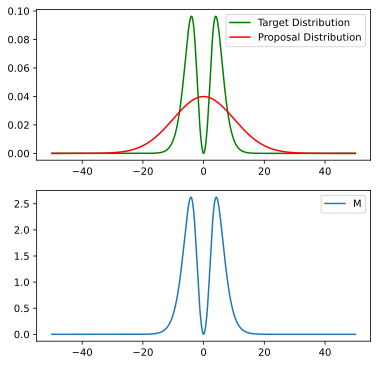

In [2]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'svg'

fig, (ax, bx) = plt.subplots(nrows=2, figsize=(6, 6))
x_grid = np.linspace(-50, 50, 1000)
f_y, g_y = f(x_grid), g(x_grid)

ax.plot(x_grid, f_y, label='Target Distribution', color='green')
ax.plot(x_grid, g_y, label='Proposal Distribution', color='red')
ax.legend()

bx.plot(x_grid, f_y / g_y, label='M')
bx.legend()

plt.show()

选取$M = 3$，从正态分布$\mathcal N(0, 100)$中采样。

In [3]:
from scipy.stats import norm, uniform

M = 3
N = 50000
g_samples = norm.rvs(size=N, scale=var ** 0.5)
u_samples = uniform.rvs(size=N)

acc_prob = f(g_samples) / g(g_samples) / M
result = g_samples[acc_prob > u_samples]
rejected = g_samples[~(acc_prob > u_samples)]
print(f'Sample efficiency {result.shape[0] / N * 100:.2f}%')

Sample efficiency 33.40%


绘制采样结果和概率密度的分布。从原理上看，拒绝采样的原理是首先通过系数$M$，将目标分布的概率密度压缩到提议分布的概率密度下方，之后只保留目标分布概率密度下方（即$u < f(x) / Mg(x)$）的样本$x$

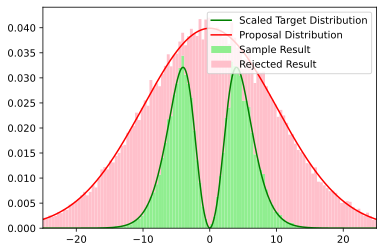

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(x_grid, f_y / M, label='Scaled Target Distribution', color='green')
ax.plot(x_grid, g_y, label='Proposal Distribution', color='red')
ax.hist(
    [result, rejected], label=['Sample Result', 'Rejected Result'],
    color=['lightgreen', 'pink'], density=True, bins=200, stacked=True
)
ax.set_xlim(-25, 25)
ax.legend(loc='upper right')

plt.show()